In [50]:
import umap
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Doing UMAP analysis for the scouting results from all NPs and neat plasma  

In [3]:
dfdf=pd.read_excel(r'F:\\Seer_project\\NPs_scout.xlsx',sheet_name='Sheet1')
dfdf.set_index('Unnamed: 0',inplace=True)

In [4]:
dfdf=dfdf.fillna(1)
dfdf.index=range(1,622)


In [5]:
dfdf

,DD,NP1,NP2,NP3,NP4,NP5,pro_names,new_index,old_index,Biomarkers
1,1.000000,1.000000,4.917836,4.349819,1.000000,5.900115,P00734,THRB,1/DECOY_0_sp|P00734|THRB_HUMAN,no
2,1.000000,3.790649,1.000000,1.000000,1.000000,1.000000,P01024,CO3,1/DECOY_0_sp|P01024|CO3_HUMAN,yes
3,1.000000,1.000000,1.000000,1.000000,4.194894,1.000000,P02647,APOA1,1/DECOY_0_sp|P02647|APOA1_HUMAN,yes
4,1.000000,1.000000,3.907626,1.000000,1.000000,1.000000,P02671,FIBA,1/DECOY_0_sp|P02671|FIBA_HUMAN,yes
5,1.000000,1.000000,1.000000,1.000000,1.000000,3.732767,P04211,LV743,1/DECOY_0_sp|P04211|LV743_HUMAN,no
...,...,...,...,...,...,...,...,...,...,...
617,5.119214,1.000000,1.000000,4.608127,4.738867,4.209833,P0DP04,HV321,9/sp|P0DP04|HV43D_HUMAN/sp|P01782|HV309_HUMAN/...,no
618,4.653399,3.842820,1.000000,4.709690,4.609838,1.000000,P0DP08,HV404,9/sp|P0DP08|HVD82_HUMAN/sp|P0DP07|HV431_HUMAN/...,no
619,1.000000,4.388111,4.377766,1.000000,4.323882,1.000000,Q99880,H2B1K,9/sp|Q99880|H2B1L_HUMAN/sp|Q99879|H2B1M_HUMAN/...,no
620,1.000000,4.399519,4.156327,4.203466,4.331807,4.431339,Q9BYX7,POTEF,9/sp|Q9BYX7|ACTBM_HUMAN/sp|Q6S8J3|POTEE_HUMAN/...,no


In [6]:
i=1

np_only=dfdf[(dfdf['DD']==i)&((dfdf['NP1']!=i)|(dfdf['NP2']!=i)|(dfdf['NP3']!=i)|(dfdf['NP4']!=i)|(dfdf['NP5']!=i))]

dd_only=dfdf[(dfdf['DD']!=i)&((dfdf['NP1']==i)&(dfdf['NP2']==i)&(dfdf['NP3']==i)&(dfdf['NP4']==i)&(dfdf['NP5']==i))]

share=dfdf[(dfdf['DD']!=i)&((dfdf['NP1']!=i)|(dfdf['NP2']!=i)|(dfdf['NP3']!=i)|(dfdf['NP4']!=i)|(dfdf['NP5']!=i))]

In [7]:
np=dfdf[((dfdf['NP1']!=i)|(dfdf['NP2']!=i)|(dfdf['NP3']!=i)|(dfdf['NP4']!=i)|(dfdf['NP5']!=i))]

dd=dfdf[(dfdf['DD']!=i)]



In [8]:
# Mark rows based on their index names being in the three lists
list1,list2=np.index,dd.index


def mark_rows(idx):
    if idx in list1:
        return "yes"
    else:
        return "no"
def mark_rows2(idx):
    if idx in list2:
        return "yes"
    else:
        return "no"

dfdf['np'] = dfdf.index.map(mark_rows)
dfdf['dd'] = dfdf.index.map(mark_rows2)   

In [9]:
dfdf

,DD,NP1,NP2,NP3,NP4,NP5,pro_names,new_index,old_index,Biomarkers,np,dd
1,1.000000,1.000000,4.917836,4.349819,1.000000,5.900115,P00734,THRB,1/DECOY_0_sp|P00734|THRB_HUMAN,no,yes,no
2,1.000000,3.790649,1.000000,1.000000,1.000000,1.000000,P01024,CO3,1/DECOY_0_sp|P01024|CO3_HUMAN,yes,yes,no
3,1.000000,1.000000,1.000000,1.000000,4.194894,1.000000,P02647,APOA1,1/DECOY_0_sp|P02647|APOA1_HUMAN,yes,yes,no
4,1.000000,1.000000,3.907626,1.000000,1.000000,1.000000,P02671,FIBA,1/DECOY_0_sp|P02671|FIBA_HUMAN,yes,yes,no
5,1.000000,1.000000,1.000000,1.000000,1.000000,3.732767,P04211,LV743,1/DECOY_0_sp|P04211|LV743_HUMAN,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
617,5.119214,1.000000,1.000000,4.608127,4.738867,4.209833,P0DP04,HV321,9/sp|P0DP04|HV43D_HUMAN/sp|P01782|HV309_HUMAN/...,no,yes,yes
618,4.653399,3.842820,1.000000,4.709690,4.609838,1.000000,P0DP08,HV404,9/sp|P0DP08|HVD82_HUMAN/sp|P0DP07|HV431_HUMAN/...,no,yes,yes
619,1.000000,4.388111,4.377766,1.000000,4.323882,1.000000,Q99880,H2B1K,9/sp|Q99880|H2B1L_HUMAN/sp|Q99879|H2B1M_HUMAN/...,no,yes,no
620,1.000000,4.399519,4.156327,4.203466,4.331807,4.431339,Q9BYX7,POTEF,9/sp|Q9BYX7|ACTBM_HUMAN/sp|Q6S8J3|POTEE_HUMAN/...,no,yes,no


In [10]:
final=dfdf.iloc[:,:6]

In [11]:

reducer = umap.UMAP(random_state=42,n_neighbors=10, min_dist=1)

embedding = reducer.fit_transform(final)

In [12]:
df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
df['np'] = dfdf['np'].tolist()
df['dd'] = dfdf['dd'].tolist()

df['biomarkers'] = dfdf['Biomarkers'].tolist()

In [13]:
df

,UMAP1,UMAP2,np,dd,biomarkers
0,15.307256,5.710527,yes,no,no
1,18.757587,-1.772129,yes,no,yes
2,0.502827,22.504410,yes,no,yes
3,2.756092,-7.030830,yes,no,yes
4,22.963501,16.651091,yes,no,no
...,...,...,...,...,...
616,8.090817,8.073222,yes,yes,no
617,6.031455,5.336318,yes,yes,no
618,2.839363,17.337492,yes,no,no
619,0.810970,10.964154,yes,no,no


In [14]:
knp=df[df['np']=='yes']
kdd=df[df['dd']=='yes']
kbio=df[df['biomarkers']=='yes']



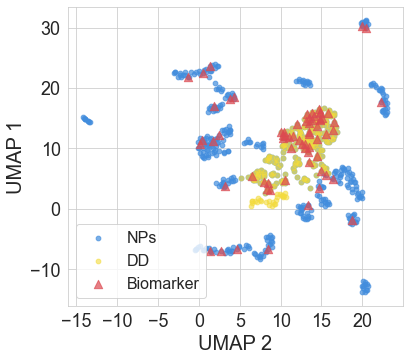

In [152]:
#DC4A51
matplotlib.rcParams['font.family'] = "Arial"
plt.figure(figsize=(6, 5.5))
sns.set_style("whitegrid")
plt.scatter(knp['UMAP1'], knp['UMAP2'], c='#428DDD', s=90, marker=".", alpha=0.7,label='NPs')
plt.scatter(kdd['UMAP1'], kdd['UMAP2'],  c='#F3DB3D', s=90,marker='.', alpha=0.6,label='DD')
plt.scatter(kbio['UMAP1'], kbio['UMAP2'],  c='#DC4A51', s=70,marker='^', alpha=0.7,label='Biomarker')
plt.legend(fontsize=16)
plt.xlabel('UMAP 2',fontsize=20)
plt.ylabel('UMAP 1',fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=16)
plt.savefig(r'F:\\Seer_project\\figures\\scatter_biomarker_NP_scout.svg', dpi=800,bbox_inches='tight')
plt.show()

In [58]:
dfdf.iloc[:,:6]

,DD,NP1,NP2,NP3,NP4,NP5
1,1.000000,1.000000,4.917836,4.349819,1.000000,5.900115
2,1.000000,3.790649,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,4.194894,1.000000
4,1.000000,1.000000,3.907626,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000,1.000000,3.732767
...,...,...,...,...,...,...
617,5.119214,1.000000,1.000000,4.608127,4.738867,4.209833
618,4.653399,3.842820,1.000000,4.709690,4.609838,1.000000
619,1.000000,4.388111,4.377766,1.000000,4.323882,1.000000
620,1.000000,4.399519,4.156327,4.203466,4.331807,4.431339


In [57]:
# do reverse log10 to the dataframe


df_ratio=np.power(10,dfdf.iloc[:,:6])
df_ratio

,DD,NP1,NP2,NP3,NP4,NP5
1,10.000000,10.000000,82762.874634,22377.888489,10.000000,794539.394531
2,10.000000,6175.176819,10.000000,10.000000,10.000000,10.000000
3,10.000000,10.000000,10.000000,10.000000,15663.669678,10.000000
4,10.000000,10.000000,8084.002441,10.000000,10.000000,10.000000
5,10.000000,10.000000,10.000000,10.000000,10.000000,5404.641052
...,...,...,...,...,...,...
617,131587.430176,10.000000,10.000000,40562.716675,54810.883301,16211.871704
618,45019.344482,6963.376343,10.000000,51249.601074,40722.798706,10.000000
619,10.000000,24440.559265,23865.262451,10.000000,21080.542480,10.000000
620,10.000000,25091.030762,14332.652588,15975.925171,21468.741272,26998.485840


In [64]:

ratio=[]
for i in range(len(df_ratio)):
    bilv=np.log10(max(df_ratio.iloc[i,1:6])/df_ratio.iloc[i,0])
    ratio.append(bilv)
len(ratio)

621

In [61]:
len([i for i in ratio if i>0])

517

In [65]:
df_ratio['ratio']=ratio

In [36]:
#dfdf.to_excel(r'F:\\Seer_project\\scout_all_log.xlsx')

In [78]:
#ratio

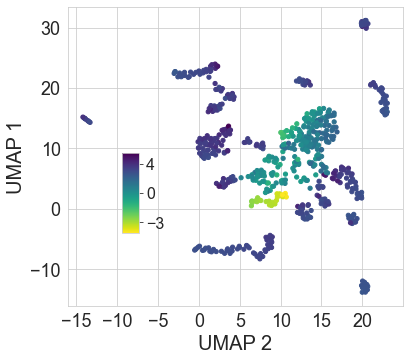

In [153]:
from matplotlib.colors import TwoSlopeNorm

color_gradient = ratio
matplotlib.rcParams['font.family'] = "Arial"
plt.figure(figsize=(6, 5.5))
sns.set_style("whitegrid")

# Set 0 as the center for the colormap
norm = TwoSlopeNorm(vcenter=0, vmin=np.array(color_gradient).min(), vmax=np.array(color_gradient).max())

scatter=plt.scatter(df['UMAP1'], df['UMAP2'], c=color_gradient, s=70, marker=".",  cmap="viridis_r", norm=norm)
#twilight_shifted
#
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('UMAP 2',fontsize=20)
plt.ylabel('UMAP 1',fontsize=20)
# Define position and size for colorbar axes
cax_position = [0.25, 0.31, 0.04, 0.2]  # Modify these values as needed
cax = plt.gcf().add_axes(cax_position)

# Draw the colorbar in the specified axes
cbar = plt.colorbar(scatter, cax=cax)
cbar.set_ticks([-3, 0, 4])
#cbar.set_label('Ratio', rotation=270, labelpad=15)
cbar.ax.tick_params(labelsize=16)

plt.savefig(r'F:\\Seer_project\\figures\\scatter_biomarker_NP_ratio_scout.svg', dpi=800,bbox_inches='tight')
plt.show()

In [19]:
# doing umap analysis for five different NPs
or_df=dfdf.iloc[:,1:6]
or_df

,NP1,NP2,NP3,NP4,NP5
1,1.000000,4.917836,4.349819,1.000000,5.900115
2,3.790649,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,4.194894,1.000000
4,1.000000,3.907626,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000,3.732767
...,...,...,...,...,...
617,1.000000,1.000000,4.608127,4.738867,4.209833
618,3.842820,1.000000,4.709690,4.609838,1.000000
619,4.388111,4.377766,1.000000,4.323882,1.000000
620,4.399519,4.156327,4.203466,4.331807,4.431339


# Doing UMAP analysis for the targeted results(1.4min) from all NPs and neat plasma

In [121]:
da=pd.read_excel(r'F:\\Seer_project\\NPs_DD_Highcon_only.xlsx')

In [122]:
da

,Unnamed: 0,DD,NP1,NP2,NP3,NP4,NP5,pro_names,new_index,Biomarkers
0,1/DECOY_0_sp|P00734|THRB_HUMAN,NaN,NaN,NaN,NaN,NaN,4.716331,P00734,THRB,no
1,1/DECOY_0_sp|P01024|CO3_HUMAN,NaN,NaN,4.098878,NaN,NaN,NaN,P01024,CO3,yes
2,1/DECOY_0_sp|P33908|MA1A1_HUMAN,NaN,NaN,NaN,NaN,4.714703,NaN,P33908,MA1A1,no
3,1/DECOY_0_sp|Q15113|PCOC1_HUMAN,NaN,4.704127,NaN,4.861835,NaN,NaN,Q15113,PCOC1,no
4,1/contam_sp|P00761|TRYP_PIG,6.870006,7.186597,6.995179,6.732337,7.031897,7.151410,P00761,TRYP,no
...,...,...,...,...,...,...,...,...,...,...
438,9/sp|P06310|KV230_HUMAN/sp|P01615|KVD28_HUMAN/...,5.235654,4.343986,4.296914,4.693992,4.478175,4.808054,P06310,KV228,no
439,9/sp|P0DP04|HV43D_HUMAN/sp|P01782|HV309_HUMAN/...,4.871370,4.481642,NaN,4.649269,NaN,NaN,P0DP04,HV321,no
440,9/sp|P0DP08|HVD82_HUMAN/sp|P0DP07|HV431_HUMAN/...,4.892915,NaN,NaN,5.185173,4.654724,NaN,P0DP08,HV404,no
441,9/sp|Q99880|H2B1L_HUMAN/sp|Q99879|H2B1M_HUMAN/...,NaN,NaN,NaN,NaN,4.160067,NaN,Q99880,H2B1K,no


In [123]:
da.set_index('Unnamed: 0',inplace=True)

In [124]:
da=da.fillna(1)
da.index=range(1,444)

In [125]:
da

,DD,NP1,NP2,NP3,NP4,NP5,pro_names,new_index,Biomarkers
1,1.000000,1.000000,1.000000,1.000000,1.000000,4.716331,P00734,THRB,no
2,1.000000,1.000000,4.098878,1.000000,1.000000,1.000000,P01024,CO3,yes
3,1.000000,1.000000,1.000000,1.000000,4.714703,1.000000,P33908,MA1A1,no
4,1.000000,4.704127,1.000000,4.861835,1.000000,1.000000,Q15113,PCOC1,no
5,6.870006,7.186597,6.995179,6.732337,7.031897,7.151410,P00761,TRYP,no
...,...,...,...,...,...,...,...,...,...
439,5.235654,4.343986,4.296914,4.693992,4.478175,4.808054,P06310,KV228,no
440,4.871370,4.481642,1.000000,4.649269,1.000000,1.000000,P0DP04,HV321,no
441,4.892915,1.000000,1.000000,5.185173,4.654724,1.000000,P0DP08,HV404,no
442,1.000000,1.000000,1.000000,1.000000,4.160067,1.000000,Q99880,H2B1K,no


In [126]:
i=1

np_only_tar=da[(da['DD']==i)&((da['NP1']!=i)|(da['NP2']!=i)|(da['NP3']!=i)|(da['NP4']!=i)|(da['NP5']!=i))]

dd_only_tar=da[(da['DD']!=i)&((da['NP1']==i)&(da['NP2']==i)&(da['NP3']==i)&(da['NP4']==i)&(da['NP5']==i))]

share_tar=da[(da['DD']!=i)&((da['NP1']!=i)|(da['NP2']!=i)|(da['NP3']!=i)|(da['NP4']!=i)|(da['NP5']!=i))]

In [127]:
np_tar=da[((da['NP1']!=i)|(da['NP2']!=i)|(da['NP3']!=i)|(da['NP4']!=i)|(da['NP5']!=i))]

dd_tar=da[(da['DD']!=i)]

In [128]:
# Mark rows based on their index names being in the three lists
list1,list2=np_tar.index,dd_tar.index

def mark_rows(idx):
    if idx in list1:
        return "yes"
    else:
        return "no"
def mark_rows2(idx):
    if idx in list2:
        return "yes"
    else:
        return "no"

da['np'] =da.index.map(mark_rows)
da['dd'] = da.index.map(mark_rows2)   

In [43]:
#da.to_csv(r'F:\\Seer_project\\NPs_DD_Highcon_only.csv')

In [129]:
final_tar=da.iloc[:,:6]    # make a final_Tar for umap fit 

In [130]:
final_tar

,DD,NP1,NP2,NP3,NP4,NP5
1,1.000000,1.000000,1.000000,1.000000,1.000000,4.716331
2,1.000000,1.000000,4.098878,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,4.714703,1.000000
4,1.000000,4.704127,1.000000,4.861835,1.000000,1.000000
5,6.870006,7.186597,6.995179,6.732337,7.031897,7.151410
...,...,...,...,...,...,...
439,5.235654,4.343986,4.296914,4.693992,4.478175,4.808054
440,4.871370,4.481642,1.000000,4.649269,1.000000,1.000000
441,4.892915,1.000000,1.000000,5.185173,4.654724,1.000000
442,1.000000,1.000000,1.000000,1.000000,4.160067,1.000000


In [131]:
reducer_tar = umap.UMAP(random_state=42,n_neighbors=10, min_dist=1)

embedding_tar = reducer_tar.fit_transform(final_tar)

In [132]:
dada = pd.DataFrame(embedding_tar, columns=['UMAP1', 'UMAP2'])
dada['np'] = da['np'].tolist()
dada['dd'] = da['dd'].tolist()

dada['biomarkers'] = da['Biomarkers'].tolist()

In [133]:
dada

,UMAP1,UMAP2,np,dd,biomarkers
0,4.996880,0.696698,yes,no,no
1,15.746007,22.274225,yes,no,yes
2,10.950951,7.183251,yes,no,no
3,2.611912,2.569785,yes,no,no
4,9.277369,17.252047,yes,yes,no
...,...,...,...,...,...
438,4.035195,13.676760,yes,yes,no
439,-3.230982,8.676038,yes,yes,no
440,3.464507,7.813581,yes,yes,no
441,10.332946,5.457003,yes,no,no


In [134]:
knp_tar=dada[dada['np']=='yes']
kdd_tar=dada[dada['dd']=='yes']
kbio_tar=dada[dada['biomarkers']=='yes']

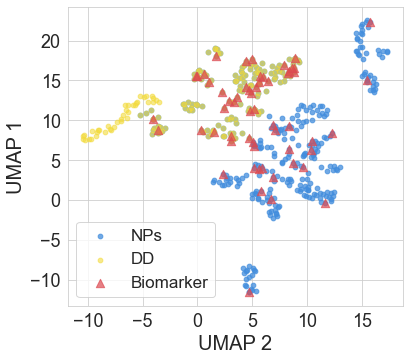

In [154]:
matplotlib.rcParams['font.family'] = "Arial"
plt.figure(figsize=(6, 5.5))
sns.set_style("whitegrid")
plt.scatter(knp_tar['UMAP1'], knp_tar['UMAP2'], c='#428DDD', s=90, marker=".", alpha=0.75,label='NPs')
plt.scatter(kdd_tar['UMAP1'], kdd_tar['UMAP2'],  c='#F3DB3D', s=90,marker='.', alpha=0.6,label='DD')
plt.scatter(kbio_tar['UMAP1'], kbio_tar['UMAP2'],  c='#DC4A51', s=70,marker='^', alpha=0.7,label='Biomarker')
#plt.legend(fontsize=16)
plt.xlabel('UMAP 2',fontsize=20)
plt.ylabel('UMAP 1',fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=16)
plt.legend(fontsize=17)
plt.savefig(r'F:\\Seer_project\\figures\\scatter_biomarker_NP_tar.svg', dpi=800,bbox_inches='tight')
plt.show()

In [147]:

df_ratio2=np.power(10,da.iloc[:,:6])
ratio_tar=[]
for i in range(len(df_ratio2)):
    bilv2=np.log10(max(df_ratio2.iloc[i,1:6])/df_ratio2.iloc[i,0])
    ratio_tar.append(bilv2)
len(ratio_tar)



443

In [148]:
da['ratio']=ratio_tar

In [149]:
da

,DD,NP1,NP2,NP3,NP4,NP5,pro_names,new_index,Biomarkers,np,dd,ratio
1,1.000000,1.000000,1.000000,1.000000,1.000000,4.716331,P00734,THRB,no,yes,no,3.716331
2,1.000000,1.000000,4.098878,1.000000,1.000000,1.000000,P01024,CO3,yes,yes,no,3.098878
3,1.000000,1.000000,1.000000,1.000000,4.714703,1.000000,P33908,MA1A1,no,yes,no,3.714703
4,1.000000,4.704127,1.000000,4.861835,1.000000,1.000000,Q15113,PCOC1,no,yes,no,3.861835
5,6.870006,7.186597,6.995179,6.732337,7.031897,7.151410,P00761,TRYP,no,yes,yes,0.316590
...,...,...,...,...,...,...,...,...,...,...,...,...
439,5.235654,4.343986,4.296914,4.693992,4.478175,4.808054,P06310,KV228,no,yes,yes,-0.427600
440,4.871370,4.481642,1.000000,4.649269,1.000000,1.000000,P0DP04,HV321,no,yes,yes,-0.222101
441,4.892915,1.000000,1.000000,5.185173,4.654724,1.000000,P0DP08,HV404,no,yes,yes,0.292258
442,1.000000,1.000000,1.000000,1.000000,4.160067,1.000000,Q99880,H2B1K,no,yes,no,3.160067


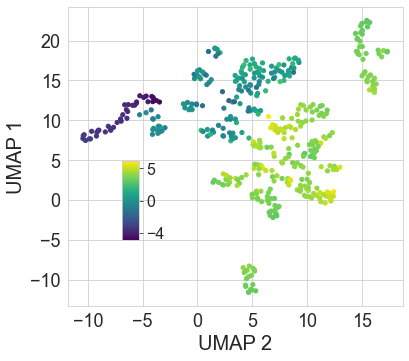

In [155]:
from matplotlib.colors import TwoSlopeNorm

color_gradient_tar = ratio_tar
matplotlib.rcParams['font.family'] = "Arial"
plt.figure(figsize=(6, 5.5))
sns.set_style("whitegrid")

# Set 0 as the center for the colormap
norm = TwoSlopeNorm(vcenter=0, vmin=np.array(color_gradient_tar).min(), vmax=np.array(color_gradient_tar).max())
scatter=plt.scatter(dada['UMAP1'], dada['UMAP2'], c=color_gradient_tar, s=70, marker=".",  cmap="viridis", norm=norm)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('UMAP 2',fontsize=20)
plt.ylabel('UMAP 1',fontsize=20)
# Define position and size for colorbar axes
cax_position = [0.25, 0.29, 0.04, 0.2]  # Modify these values as needed
cax = plt.gcf().add_axes(cax_position)

# Draw the colorbar in the specified axes
cbar = plt.colorbar(scatter, cax=cax)
cbar.set_ticks([-4,0,5])
#cbar.set_label('Ratio', rotation=270, labelpad=15)
cbar.ax.tick_params(labelsize=16)

plt.savefig(r'F:\\Seer_project\\figures\\scatter_biomarker_NP_ratio_tar.svg', dpi=800,bbox_inches='tight')
plt.show()